
# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. 

### Objective

- Build a baseline classification model then run a few experiments with different optimizers and learning rates. 
- Don't forgot to [**switch to GPU on if you're running your notebook on Colab!**](https://colab.research.google.com/notebooks/gpu.ipynb)

## Load Your Data

In [64]:
# imports in first cell 
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# use Sequential to build out your model
from tensorflow.keras.models import Sequential

# Dense layer is used for Fully Connected Forward Feeding networks
from tensorflow.keras.layers import Dense

In [65]:
# load in data set
data = np.load('/content/quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [66]:
class_names = ['apple',
             'anvil',
             'airplane',
             'banana',
             'The Eiffel Tower',
             'The Mona Lisa',
             'The Great Wall of China',
             'alarm clock',
             'ant',
             'asparagus']

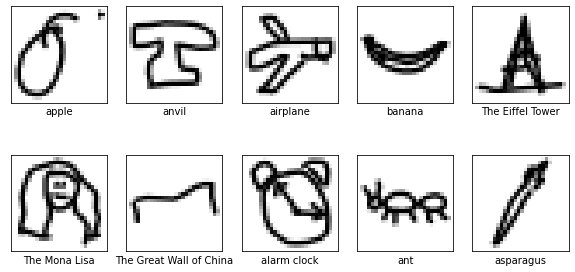

In [67]:
# these are your 10 unique images
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

Say hello to the Quickdraw dataset. 

You'll be using this dataset a lot this week as an alternative to the mnist which we'll be using in the guided projects. The nice thing about this dataset is that it's simple, which allows us to focus on our model, it's various components, and gradually coming to a better understand of how to build neural networks without worrying about cleaning and preping our image data too much. 

In [68]:
# always a good idea to shuffle your dataset 
X, y = shuffle(X, y)

-----

## Build Your Baseline Model

Make sure that you

- **Determine** the dimensionality of your input data by investigating **X**
- **Normalize** your input data to values between 0 and 1 
- **Determine** the number of neurons in your output layer by investigating **Y**
- **Select** `sparse_categorical_crossentropy` as your loss function.
- **Select** `sgd` as your optimizer.
- **Add** 3 hidden layers to your model with the following number of nodes
    - h1 has 500 nodes
    - h2 has 250 nodes
    - h3 has 100 nodes
    
- **Set** epochs to 20 
- **Use** the `validation_split` command to automatically create a training / validation dataset from within the model, so you don't have to do it yourself.
    -  Specify a percentage such as .2 in your fit statement.
 
 
Not sure what the various parameters are for or what what values to assign to them?

- Reference the guided project notebook for Sprint 2 Module 1
- Reference the [**Keras documentation**](https://keras.io/api/)
- Google other examples
- Discuss your results with classmates 

In [69]:
# get dim of image row vectors and save to input_dim
input_dim = X.shape[1]
# get number of unique labels and save to n_output_nodels
n_output_nodels = len(class_names)
# normalize image data to values between 0 and 1 (by dividing by max pixel value)
max_value = 255
X_scaled = X.astype('float32') / max_value

In [70]:
# a check on your data prep 
assert  X_scaled.max(), "Max pixel value should be 1.0, make sure you normalize your data"

In [71]:
# instantiate a sequential object and call it model, then add layers to your model
model = Sequential()
# Hidden layer # 1
model.add(Dense(500, activation='relu', input_dim=input_dim))
# Hidden layer # 2
model.add(Dense(250, activation='relu'))
# Hidden layer # 3
model.add(Dense(100, activation='relu'))
# Output layer
model.add(Dense(10, activation='softmax'))

# add a compile layer but don't fit your model yet 
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [72]:
# a check on your model architecture 
n_layers = len(model.get_config()["layers"])
assert n_layers == 5, "You should have 5 layers: input, h1, h2, h3, and output"

In [73]:
# check out your model summary 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_5 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 543,860
Trainable params: 543,860
Non-trainable params: 0
_________________________________________________________________


In [74]:
epochs = 20
# fit your model and save training resuts to history 
history = model.fit(X_scaled, y, 
                    epochs=epochs, 
                    # test set will be generated within the model
                    validation_split=0.2
                   )

Epoch 1/20
2500/2500 [==============================] - 7s 3ms/step - loss: 0.9608 - accuracy: 0.7149 - val_loss: 0.7262 - val_accuracy: 0.7879
Epoch 2/20
2500/2500 [==============================] - 6s 3ms/step - loss: 0.6512 - accuracy: 0.8103 - val_loss: 0.6128 - val_accuracy: 0.8195
Epoch 3/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.5562 - accuracy: 0.8353 - val_loss: 0.5573 - val_accuracy: 0.8325
Epoch 4/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.4948 - accuracy: 0.8551 - val_loss: 0.5132 - val_accuracy: 0.8461
Epoch 5/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.4468 - accuracy: 0.8689 - val_loss: 0.4896 - val_accuracy: 0.8554
Epoch 6/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.4077 - accuracy: 0.8804 - val_loss: 0.4864 - val_accuracy: 0.8573
Epoch 7/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3755 - accuracy: 0.8906 - val_loss: 0.4609 - val_accuracy:

----
### Visualize the results

- Move results in `history` in a dataframe 
- Use [**Seaborn**](https://seaborn.pydata.org/generated/seaborn.lineplot.html) to create lineplots for both loss and accuracy by epoch. 
- Analyze the results and write a couple of obsverations. 

At what point should we have stopped training the model and why? 

In [75]:
df = pd.DataFrame.from_dict(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.960835,0.714887,0.726213,0.78785
1,0.651169,0.810263,0.612849,0.81955
2,0.556196,0.835300,0.557305,0.83250
3,0.494838,0.855075,0.513234,0.84605
4,0.446797,0.868900,0.489581,0.85540
5,0.407679,0.880413,0.486375,0.85735
6,0.375495,0.890612,0.460918,0.86330
7,0.346804,0.898088,0.448438,0.86965
8,0.321919,0.905575,0.441286,0.87140
9,0.296590,0.914150,0.437604,0.87200


In [76]:
# a check on our model training
assert df.shape[0] == 20, "df should have the training results from 20 epochs"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


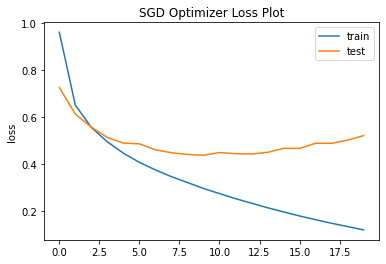

In [87]:
# use the plotting method in your dataframe to plot the modeling results 

epochs_sgd = [i for i in range(len(df['loss']))]
sns.lineplot(epochs_sgd, df['loss'], label="train")
sns.lineplot(epochs_sgd, df['val_loss'], label="test")
plt.title('SGD Optimizer Loss Plot')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SGD Optimizer Accuracy Plot')

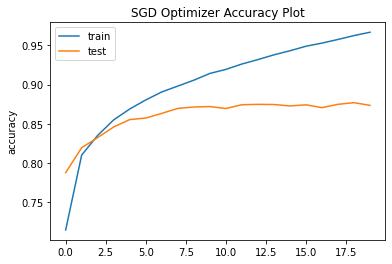

In [88]:
sns.lineplot(epochs_sgd, df['accuracy'], label="train")
sns.lineplot(epochs_sgd, df['val_accuracy'], label="test")
plt.title('SGD Optimizer Accuracy Plot')

### Observations 

Based on the plot of the training and validation loss answer the following questions. 

**Was our model able to learn over the course of the 20 epochs? Why or why not?**

Yes, our SGD Optimizer model was able to learn over 20 epochs because it started with a low training accuracy (0.71) and over 20 epochs improved that to a very high accuracy (0.97). Similarly, the validation accuracy started lower (0.78) and over 20 epochs improved to 0.87.

**Is our model overfitting? Why or why not?**

The SGD Optimizer model is overfitting but not by a lot (by the 20th epoch). Even though there is continued divergence between the training and validation accuracy, it did not reach the point where the validation accuracy started to reduce.

**Could the model score benefit from additional epochs? Why or why not?**

No, because the validation accuracy had already started to flatten by the 20th epoch and any further epochs would have exarcerbated the overfitting and caused the validation accuracy to begin to go down.

-----
## Change Optimizers

Let's compare model performance between difference optimizers. 
- Build a new model, identical as the last one but using `adam` for the optimizer. 
- Visualize the training results just as we did for the last model. 
- Save modeling results to adam_history so we don't erase the results from the previous model run

In [79]:
# train same model as above but use sgd if you used adam previously ( or use adam if you used sgd previously)

# YOUR CODE HERE
# instantiate a sequential object and call it model, then add layers to your model
model_adam = Sequential()
# Hidden layer # 1
model_adam.add(Dense(500, activation='relu', input_dim=input_dim))
# Hidden layer # 2
model_adam.add(Dense(250, activation='relu'))
# Hidden layer # 3
model_adam.add(Dense(100, activation='relu'))
# Output layer
model_adam.add(Dense(10, activation='softmax'))

# add a compile layer but don't fit your model yet 
model_adam.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')


In [80]:
epochs = 20
# fit your model and save training resuts to history 
history_adam = model_adam.fit(X_scaled, y, 
                    epochs=epochs, 
                    # test set will be generated within the model
                    validation_split=0.2
                   )

Epoch 1/20
2500/2500 [==============================] - 7s 3ms/step - loss: 0.5889 - accuracy: 0.8190 - val_loss: 0.4777 - val_accuracy: 0.8539
Epoch 2/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.4129 - accuracy: 0.8749 - val_loss: 0.4476 - val_accuracy: 0.8662
Epoch 3/20
2500/2500 [==============================] - 6s 3ms/step - loss: 0.3422 - accuracy: 0.8943 - val_loss: 0.4241 - val_accuracy: 0.8766
Epoch 4/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.2881 - accuracy: 0.9108 - val_loss: 0.4188 - val_accuracy: 0.8814
Epoch 5/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.2473 - accuracy: 0.9232 - val_loss: 0.4341 - val_accuracy: 0.8801
Epoch 6/20
2500/2500 [==============================] - 7s 3ms/step - loss: 0.2099 - accuracy: 0.9335 - val_loss: 0.4615 - val_accuracy: 0.8752
Epoch 7/20
2500/2500 [==============================] - 6s 3ms/step - loss: 0.1820 - accuracy: 0.9415 - val_loss: 0.5007 - val_accuracy:

In [81]:
# a check that we're using the correct optimizer in this model
opt_name = model_adam.optimizer.get_config()["name"]
assert opt_name == "Adam", "you need to use adam for the optimizer in this model."

In [89]:
# YOUR CODE HERE
df_adam = pd.DataFrame.from_dict(history_adam.history)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Adam Optimizer Loss Plot')

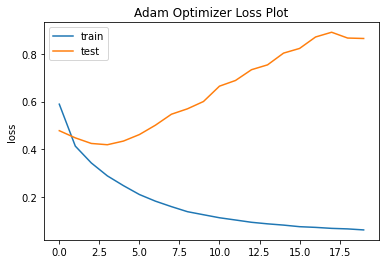

In [90]:
epochs_adam = [i for i in range(len(df_adam['loss']))]
sns.lineplot(epochs_adam, df_adam['loss'], label="train")
sns.lineplot(epochs_adam, df_adam['val_loss'], label="test")
plt.title('Adam Optimizer Loss Plot')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Adam Optimizer Accuracy Plot')

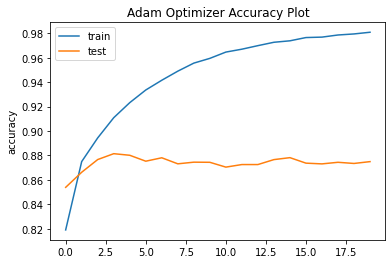

In [91]:
sns.lineplot(epochs_adam, df_adam['accuracy'], label="train")
sns.lineplot(epochs_adam, df_adam['val_accuracy'], label="test")
plt.title('Adam Optimizer Accuracy Plot')

### Observations 

This plot should look very different from the previous plot. Based on the plot of the training and validation loss answer the following questions. 

**Is our model overfitting? Why or why not?**

The Adam Optimizer model is overfitting more than the SGD Optimizer model. It is overfitting because there is a continued divergence between the accuracy of the training data and the validation accuracy. In addition, the validation loss grows (instead of reducing)as more and more epochs are run.

**Could our model's performance improve by training on more than 20 epochs? Why or why not?**

No, because additional epochs would only overfit the Adam Optimizer further.

**Assuming that you want to stick to this model architecture, what can you do to avoid overfitting?**

Add early stopping to the model or reduce the number of epochs manually.

# NAdam Optimizer

In [92]:
# instantiate a sequential object and call it model, then add layers to your model
model_nadam = Sequential()
# Hidden layer # 1
model_nadam.add(Dense(500, activation='relu', input_dim=input_dim))
# Hidden layer # 2
model_nadam.add(Dense(250, activation='relu'))
# Hidden layer # 3
model_nadam.add(Dense(100, activation='relu'))
# Output layer
model_nadam.add(Dense(10, activation='softmax'))

# add a compile layer but don't fit your model yet 
model_nadam.compile(optimizer='nadam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')


In [93]:
epochs = 20
# fit your model and save training resuts to history 
history_nadam = model_nadam.fit(X_scaled, y, 
                    epochs=epochs, 
                    # test set will be generated within the model
                    validation_split=0.2
                   )

Epoch 1/20
2500/2500 [==============================] - 9s 3ms/step - loss: 0.5768 - accuracy: 0.8249 - val_loss: 0.4885 - val_accuracy: 0.8553
Epoch 2/20
2500/2500 [==============================] - 9s 3ms/step - loss: 0.4066 - accuracy: 0.8769 - val_loss: 0.4301 - val_accuracy: 0.8712
Epoch 3/20
2500/2500 [==============================] - 8s 3ms/step - loss: 0.3356 - accuracy: 0.8971 - val_loss: 0.4501 - val_accuracy: 0.8691
Epoch 4/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.2849 - accuracy: 0.9112 - val_loss: 0.4470 - val_accuracy: 0.8721
Epoch 5/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.2436 - accuracy: 0.9239 - val_loss: 0.4796 - val_accuracy: 0.8745
Epoch 6/20
2500/2500 [==============================] - 9s 3ms/step - loss: 0.2093 - accuracy: 0.9332 - val_loss: 0.4759 - val_accuracy: 0.8781
Epoch 7/20
2500/2500 [==============================] - 8s 3ms/step - loss: 0.1831 - accuracy: 0.9415 - val_loss: 0.5004 - val_accuracy:

In [94]:
df_nadam = pd.DataFrame.from_dict(history_nadam.history)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'NAdam Optimizer Loss Plot')

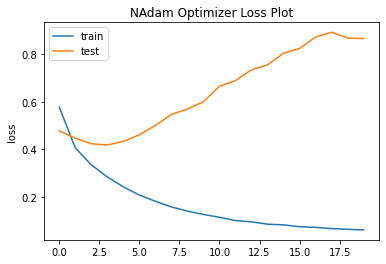

In [95]:
epochs_nadam = [i for i in range(len(df_nadam['loss']))]
sns.lineplot(epochs_nadam, df_nadam['loss'], label="train")
sns.lineplot(epochs_nadam, df_adam['val_loss'], label="test")
plt.title('NAdam Optimizer Loss Plot')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'NAdam Optimizer Accuracy Plot')

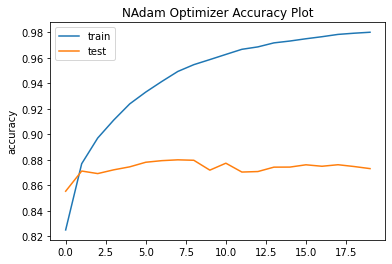

In [96]:
sns.lineplot(epochs_nadam, df_nadam['accuracy'], label="train")
sns.lineplot(epochs_nadam, df_nadam['val_accuracy'], label="test")
plt.title('NAdam Optimizer Accuracy Plot')

### **Mini-Conclusion:** NAdam Optimizer overfits even more than Adam Optimizer

------
# Conclusion 

What you have observed by comparing the two models that are identitical, except for the optimizer, is that the choice of the optimizer can have a very big influence in the training outcome of ML models in general and in a neural networks in particuar. 

You might not actually know 

- why changing the optimizer from Stocastic Gradient Descent over to Adam made a difference.
- how Gradient Desecent works 
- or that Adam is known as Adaptive Gradient Descent (i.e. is it a different version of ordinary Gradient Descent). 

But that's ok - tomorrow's lesson will be a deep dive into Gradient Descent. You'll learn the theory of Gradient Descent, we'll code up Gradient Descent from scratch, and we'll talk about how Adam is different from ordinary Gradient Descent. 

-----
# Preparation for Tomorrow 

In Preparation for tomorrow, you might need to watch a few videos. I say might because you may or may not already be comfortable with multi-variate calculus. 

### Theory of Calculus 
The theory of Gradient Descent rest on [**the derivative from Calculus**](https://www.youtube.com/watch?v=WUvTyaaNkzM). If you've never taken a Calculus course before, or are a bit rusty, definitely watch this video in preparation for tomorrow's lesson. The take away here is to conceptually understand the derivative, you won't be asked to actually calculate any derivatives by hand. 

### The Gradient - a multi-dimensional derivative
Once you've watched the previous video, you are now set up to  understand how to conceptualize a derivative in an N-dimensional space (where N is any number ranging from 2, 3, 4, ..., all the way to a very large number of dimensions N ) [**This video visually explains the multi-dimensional derivative called the Gradient visually**](https://www.youtube.com/watch?v=GkB4vW16QHI) - and that's the take away. This point of this video is to help you understand the Gradient visually using 3D surfaces. You should also know that the Gradient is made of up partial derivatives, more on this tomorrow. 

### Contour Maps 
It is very common to visual 3D surfaces as 2D contour maps - and we'll be making a lot of use of contour maps to understand Gradient Descent. Watch this video in order to [**understand the relationship between 3D surfaces and 2D contour maps**](https://www.youtube.com/watch?v=acdX4YamDtU)

### The Calculus of Backpropagation 

Unlike standard Sklearn ML models, neural networks use not just Gradient Descent but also something called Backpropagatin in order to learn from the data. [**In order to understand how backpropagation works, you need to understand the Chain Rule in Calculus**](https://www.youtube.com/watch?v=acdX4YamDtU). The take away here is to understand how a partial derivative can be decomposed into a product of multiple derivatives. 

------
# Stretch Goals

### This section is optional!

Only after you've completed the above work and watched the recommended videos, are you then encouraged to experiment with building a few more models and analyze their results. 

Here are some suggestions to help you get started. 

- Train the same model using the Sigmoid activation fucntion and the Relu activation function and note the difference in their learning outcomes.  [**Keras docs on activation fucntions**](https://keras.io/api/layers/activations/). We'll cover the Relu activation function in Sprint 2 Module 3.
- Train the same model using Normalized and non-Normalized data and note the difference in their learning outcomes. 


The objective here is to give you an oppertunity to get more practice with the Keras API (i.e. building models) and running a couple of experiments to help set you up for future lessons. In order words, we'll be discussing different activation functions and the affect of Normalized data on model training. 